In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

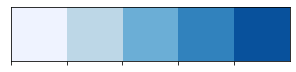

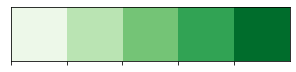

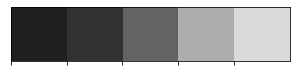

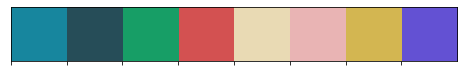

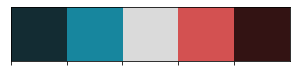

In [3]:
colors_blue = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
colors_green = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [4]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
# na_values='unknown'

   #Input variables:<br>
   
   #bank client data:<br>
   1 - age (numeric) <br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
   5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
   6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
   7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   
   #related with the last contact of the current campaign:<br>
   8 - contact: contact communication type (categorical: "cellular","telephone")<br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   
   #other attributes:<br>
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
   
   #social and economic context attributes<br>
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     <br>
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   <br>  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

  Output variable (desired target):<br>
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### How's the distribution of target ?

In [9]:
target_no = df['y'].value_counts()[0]
target_yes = df['y'].value_counts()[1]

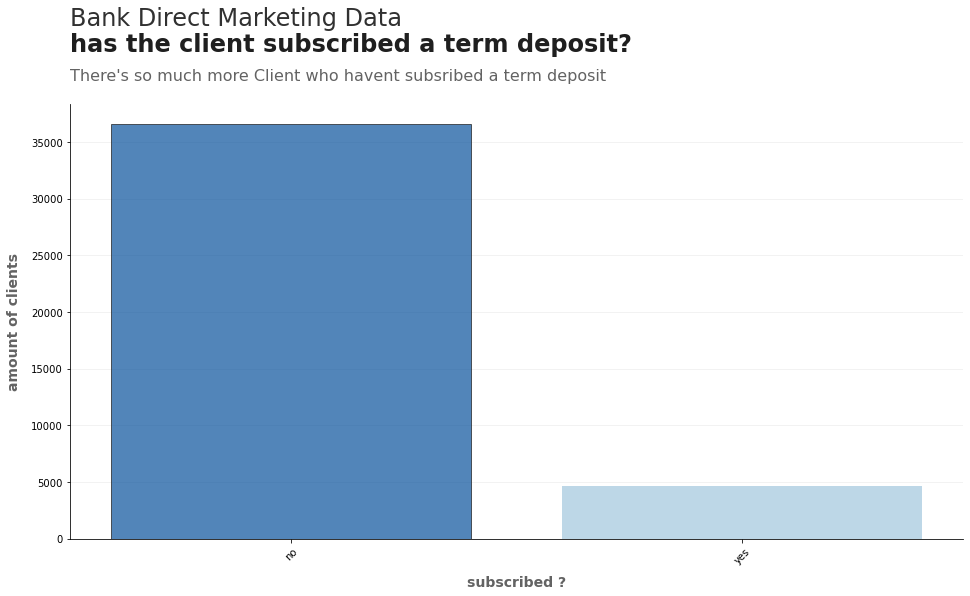

In [10]:
# membuat plot barchart
fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(['no','yes'], [target_no,target_yes], color=colors_blue[1])

# menandai bar paling besar
bars[0].set_alpha(0.7)
bars[0].set_color(colors_blue[4])
bars[0].set_edgecolor(colors_dark[0])

# setting figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("subscribed ?", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])
ax.set_ylabel("amount of clients", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])

plt.text(s="Bank Direct Marketing Data", ha='left', x=xmin, y=ymax*1.18, fontsize=24, color=colors_dark[1])
plt.text(s="has the client subscribed a term deposit?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("There's so much more Client who havent subsribed a term deposit", y=1.04, loc='left', fontsize=16, color=colors_dark[2]) 

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [11]:
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
numeric_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [13]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [14]:
#label encoder
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['y'] = le.fit_transform(df[['y']])
for column in categorical_columns:
    if (column == 'month') or (column == 'day_of_week'):
        continue
    else:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [15]:
# #labeling data categorical nominal

# for column in categorical_columns:
#     if (column == 'month') or (column == 'day_of_week') or (column == 'y'):
#         continue
#     else:
#         dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
#         df = pd.concat([df, dummies], axis=1)
#         df = df.drop([column], axis = 1)

In [16]:
df['month'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,
       'sep':9, 'jan':1, 'feb':2}, inplace=True)

df['day_of_week'].replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}, inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


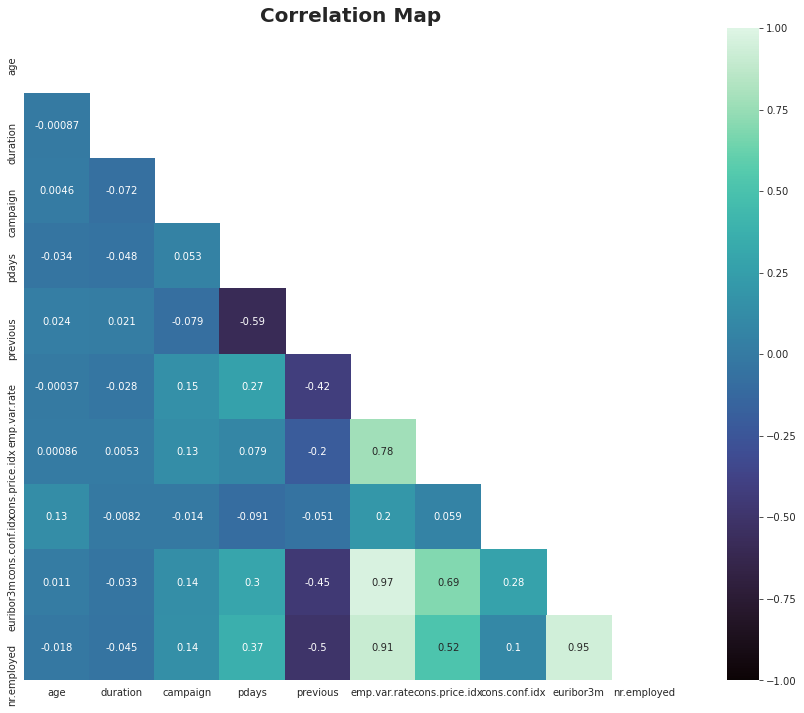

In [17]:
mask = np.zeros_like(df[numeric_columns].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(18, 12))
  sns.heatmap(df[numeric_columns].corr(), annot=True, ax=ax, square=True, mask=mask, cmap='mako', vmin=-1, vmax=1).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [18]:
del df['emp.var.rate']
del df['pdays']
del df['cons.price.idx']
del df['nr.employed']

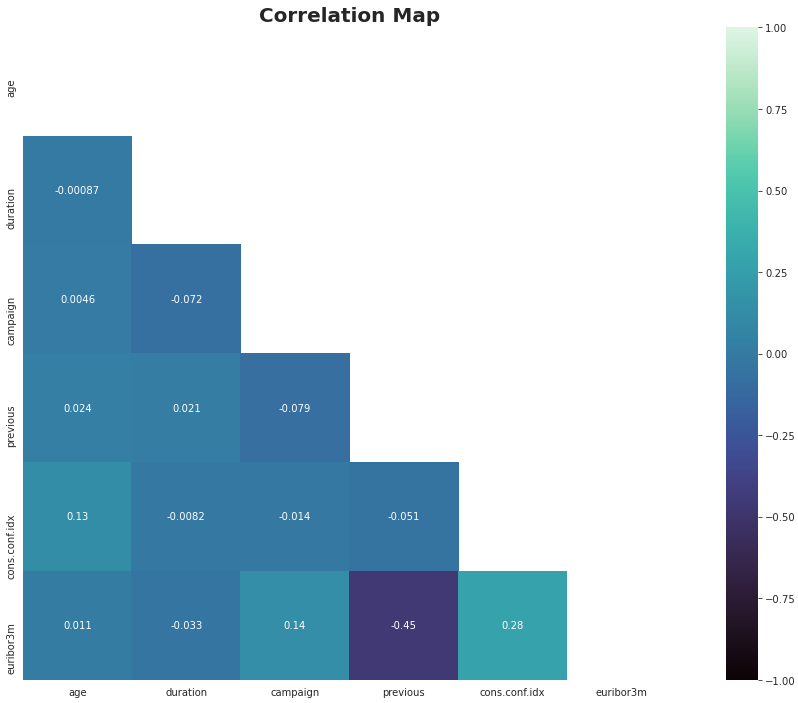

In [19]:
numeric_columns = ['age',
 'duration',
 'campaign',
 'previous',
 'cons.conf.idx',
 'euribor3m']

mask = np.zeros_like(df[numeric_columns].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(18, 12))
  sns.heatmap(df[numeric_columns].corr(), annot=True, ax=ax, square=True, mask=mask, cmap='mako', vmin=-1, vmax=1).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [20]:
# ### test undersample
# df_1 = df[df.y == 1]

# df_0 = df[df.y == 0]
# df_0 = df_0.sample((len(df_1)))

# df = pd.concat([df_0, df_1])
# len_df = len(df)

# df = df.reset_index(drop=True)
# df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,euribor3m,y
0,41,1,1,2,1,0,2,0,4,5,251,1,1,0,-47.1,1.405,0
1,30,9,1,6,0,0,0,0,8,1,176,2,0,1,-36.1,4.965,0
2,38,0,1,6,0,0,0,0,8,5,173,2,0,1,-36.1,4.963,0
3,66,3,1,0,0,0,2,0,7,2,296,1,1,0,-40.3,0.876,0
4,47,4,1,6,0,0,0,1,5,1,24,12,0,1,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,5,1,6,0,2,0,0,11,4,208,1,6,2,-50.8,1.031,1
9276,62,5,1,6,0,0,0,0,11,4,483,2,3,2,-50.8,1.031,1
9277,37,0,1,6,0,2,0,0,11,5,281,1,0,1,-50.8,1.028,1
9278,73,5,1,5,0,2,0,0,11,5,334,1,0,1,-50.8,1.028,1


In [21]:
X = df.copy().drop(columns=['y'])
y = df.copy().y

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
minmax_scaler = MinMaxScaler()

numeric_columns = ['age',
 'duration',
 'campaign',
 'previous',
 'cons.conf.idx',
 'euribor3m']

X_train.loc[:,numeric_columns] = minmax_scaler.fit_transform(X_train.loc[:,numeric_columns])

X_test.loc[:,numeric_columns] = minmax_scaler.transform(X_test.loc[:,numeric_columns])

C:\Users\62852\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\62852\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [24]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,euribor3m
7078,0.234568,9,2,6,0,2,0,0,6,1,0.067684,0.000000,0.0,1,0.418410,0.143278
5246,0.098765,1,1,0,0,0,2,1,7,4,0.239514,0.030303,0.0,1,0.338912,0.980277
2508,0.308642,1,1,2,1,2,0,0,5,2,0.074357,0.151515,0.0,1,0.192469,0.148946
4934,0.172840,9,1,6,0,0,0,1,6,4,0.233556,0.030303,0.0,1,0.376569,0.959420
4923,0.098765,11,2,6,0,0,0,1,6,3,0.524309,0.030303,0.0,1,0.376569,0.958966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.160494,9,1,5,0,0,0,1,8,3,0.153003,0.181818,0.0,1,0.615063,0.981637
5191,0.123457,7,2,3,0,0,0,0,7,1,0.254528,0.060606,0.0,1,0.338912,0.981183
5390,0.271605,0,1,6,0,0,0,0,7,5,0.176358,0.363636,0.0,1,0.338912,0.981183
860,0.234568,2,1,6,0,2,2,1,6,3,0.031459,0.000000,0.0,1,0.376569,0.958966


In [25]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,euribor3m
1313,0.358025,0,1,3,0,0,0,0,5,5,0.075071,0.030303,0.142857,0,0.192469,0.153933
4635,0.135802,6,2,6,0,2,0,1,6,1,0.016683,0.030303,0.000000,1,0.376569,0.977783
3621,0.296296,2,0,3,1,2,0,0,7,1,0.016206,0.121212,0.000000,1,0.338912,0.980730
7983,0.123457,8,2,6,0,0,2,0,11,1,0.027407,0.000000,0.000000,1,0.866109,0.018363
1018,0.234568,1,1,1,0,0,0,0,5,1,0.108913,0.000000,0.000000,1,0.192469,0.150759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0.333333,9,1,5,0,2,0,0,9,2,0.040515,0.000000,0.142857,2,0.878661,0.027431
1952,0.296296,1,1,5,0,0,0,1,5,1,0.033603,0.030303,0.000000,1,0.602510,0.957606
3418,0.481481,4,1,2,1,0,0,0,4,2,0.138465,0.000000,0.000000,1,0.154812,0.178871
3205,0.518519,1,1,0,1,0,0,1,5,5,0.100334,0.000000,0.000000,1,0.602510,0.957833


In [26]:
# validation

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

score = []

In [ ]:
# Random Forest Model

In [73]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [80, 90],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100, 200, 400],
    'random_state': [42]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
cv_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [74]:
cv_rf.fit(X_train, y_train)

cv_rf.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200,
 'random_state': 42}

In [77]:
# lets do the random forest modeling
y_pred = cv_rf.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1159
           1       0.87      0.95      0.91      1161

    accuracy                           0.91      2320
   macro avg       0.91      0.91      0.91      2320
weighted avg       0.91      0.91      0.91      2320



In [ ]:
# Logistic Regression Model

In [78]:
param_grid = {
    'C' : np.logspace(-4,4,10),
    'max_iter' : [800]
}
# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
cv_lr = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [79]:
cv_lr.fit(X_train, y_train)

cv_lr.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 10000.0, 'max_iter': 800}

In [80]:
y_pred = cv_lr.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1159
           1       0.87      0.87      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320



In [ ]:
# K-Nearest Neighbors Model

In [81]:
param_grid = {
    'n_neighbors':[3,5,7,9,11]
}

# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
cv_knn = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [82]:
cv_knn.fit(X_train, y_train)

cv_knn.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_neighbors': 7}

In [83]:
y_pred = cv_knn.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1159
           1       0.73      0.60      0.66      1161

    accuracy                           0.69      2320
   macro avg       0.70      0.69      0.69      2320
weighted avg       0.70      0.69      0.69      2320



In [ ]:
# Decision Tree Model

In [84]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [80, 90],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 8, 10],
    'random_state': [42]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
cv_dt = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [85]:
cv_dt.fit(X_train, y_train)

cv_dt.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}

In [86]:
y_pred = cv_dt.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1159
           1       0.85      0.85      0.85      1161

    accuracy                           0.85      2320
   macro avg       0.85      0.85      0.85      2320
weighted avg       0.85      0.85      0.85      2320



In [ ]:
# Naive Bayes Model

In [90]:
param_grid = {
    'var_smoothing' : np.logspace(0,-9,20),
}
# Create a based model
gnb = GaussianNB()
# Instantiate the grid search model
cv_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [91]:
cv_gnb.fit(X_train, y_train)

cv_gnb.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'var_smoothing': 2.06913808111479e-06}

In [94]:
y_pred = cv_gnb.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1159
           1       0.80      0.76      0.78      1161

    accuracy                           0.78      2320
   macro avg       0.78      0.78      0.78      2320
weighted avg       0.78      0.78      0.78      2320



In [ ]:
# Support Vector Machine

In [96]:
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [97]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1159
           1       0.86      0.88      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320



In [102]:
method = ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'G. Naive bayes', 'SVM']

score_list = {'method':method, 'score':score}
score_list = pd.DataFrame(score_list)

In [108]:
score_list.sort_values(by='score', ascending=False, inplace=True)

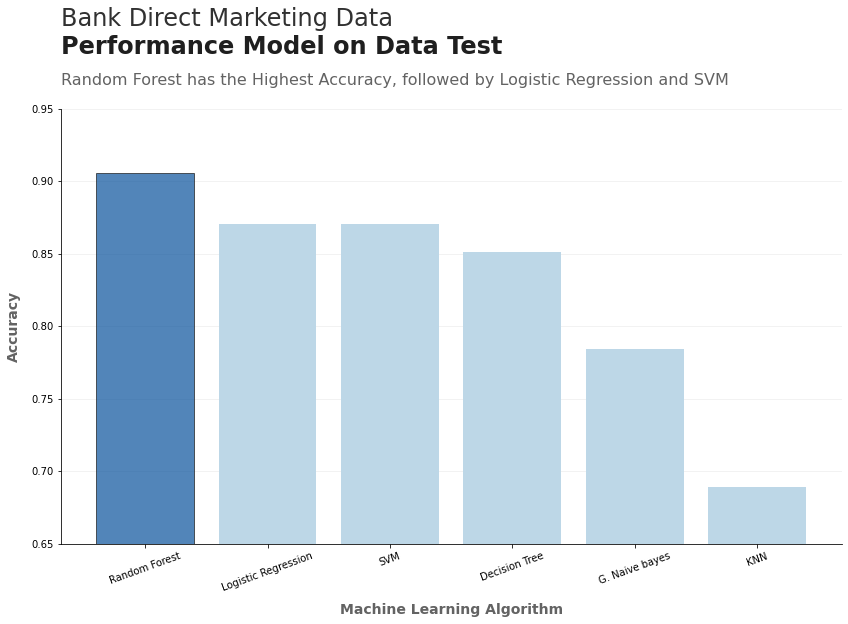

In [133]:
# membuat plot barchart
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(score_list['method'], score_list['score'], color=colors_blue[1])

# menandai bar paling besar
bars[0].set_alpha(0.7)
bars[0].set_color(colors_blue[4])
bars[0].set_edgecolor(colors_dark[0])

# setting figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)

ax = plt.gca()
ax.set_ylim([0.65, 0.95])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Machine Learning Algorithm", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])
ax.set_ylabel("Accuracy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])

plt.text(s="Bank Direct Marketing Data", ha='left', x=xmin, y=ymax*1.06, fontsize=24, color=colors_dark[1])
plt.text(s="Performance Model on Data Test", ha='left', x=xmin, y=ymax*1.04, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Random Forest has the Highest Accuracy, followed by Logistic Regression and SVM", y=1.04, loc='left', fontsize=16, color=colors_dark[2]) 

locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
plt.show()